In [5]:
# Import libraries
import pandas as pd

# Load the dataset (make sure the file is in the same folder as your notebook)
heart_data = pd.read_csv("/Users/kylelunsford/College/anaconda_projects/heart.csv.xls")

# Quick checks
print("Shape of dataset:", heart_data.shape)   # rows, columns
print("\nColumn names:\n", heart_data.columns.tolist())  # list features
print("\nMissing values:\n", heart_data.isnull().sum())  # check for nulls

# Preview first few rows
heart_data.head()

Shape of dataset: (918, 12)

Column names:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Remove duplicate rows if any
heart_data = heart_data.drop_duplicates()
print("After dropping duplicates:", heart_data.shape)

After dropping duplicates: (918, 12)


In [7]:
# Check for missing values
print(heart_data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
# One-hot encode categorical columns
heart_data_encoded = pd.get_dummies(
    heart_data,
    columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
    drop_first=True
)

print("After encoding:", heart_data_encoded.shape)
heart_data_encoded.head()

After encoding: (918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [9]:
# Save cleaned dataset for later use
heart_data_encoded.to_csv("heart_cleaned.csv", index=False)
print("✅ Cleaned data saved as 'heart_cleaned.csv'")

✅ Cleaned data saved as 'heart_cleaned.csv'


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("heart_cleaned.csv")
print(df.shape)
df.head()

(918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


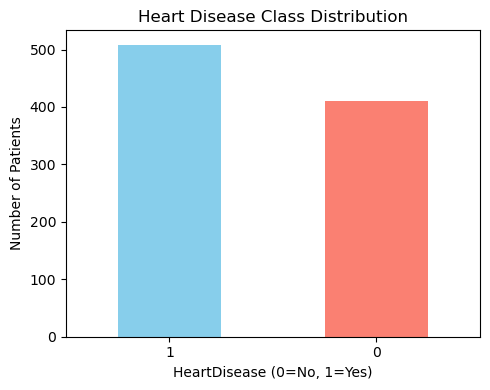

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heart_cleaned.csv")

plt.figure(figsize=(5,4))
df["HeartDisease"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Heart Disease Class Distribution")
plt.xlabel("HeartDisease (0=No, 1=Yes)")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

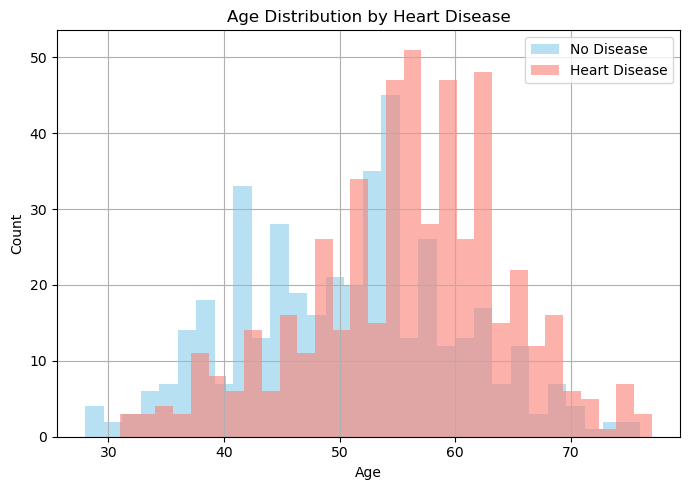

In [12]:
plt.figure(figsize=(7,5))
df[df["HeartDisease"]==0]["Age"].hist(alpha=0.6, label="No Disease", bins=30, color="skyblue")
df[df["HeartDisease"]==1]["Age"].hist(alpha=0.6, label="Heart Disease", bins=30, color="salmon")
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

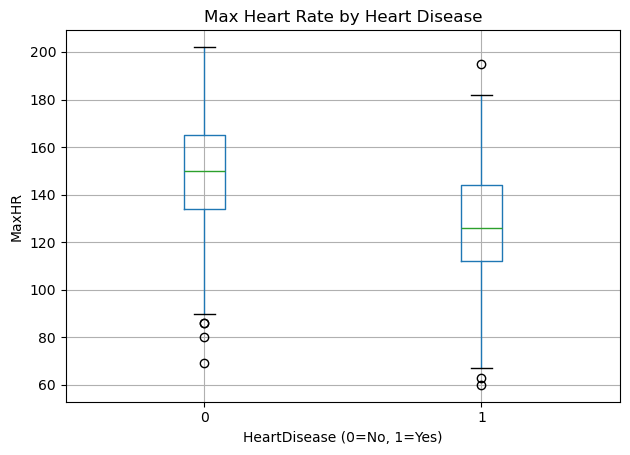

In [13]:
plt.figure(figsize=(6,4))
df.boxplot(column="MaxHR", by="HeartDisease")
plt.title("Max Heart Rate by Heart Disease")
plt.suptitle("")
plt.xlabel("HeartDisease (0=No, 1=Yes)")
plt.ylabel("MaxHR")
plt.tight_layout()
plt.show()

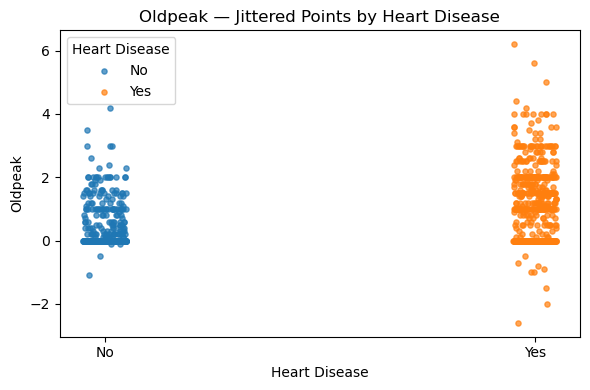

In [26]:
import numpy as np
import matplotlib.pyplot as plt

mask0 = df["HeartDisease"] == 0
mask1 = df["HeartDisease"] == 1

# jitter x so points don't stack
x0 = np.zeros(mask0.sum()) + (np.random.rand(mask0.sum()) - 0.5) * 0.1
x1 = np.ones(mask1.sum())  + (np.random.rand(mask1.sum()) - 0.5) * 0.1

plt.figure(figsize=(6,4))
plt.scatter(x0, df.loc[mask0, "Oldpeak"], s=14, alpha=0.7, label="No")
plt.scatter(x1, df.loc[mask1, "Oldpeak"], s=14, alpha=0.7, label="Yes")
plt.xticks([0,1], ["No","Yes"])
plt.xlabel("Heart Disease"); plt.ylabel("Oldpeak")
plt.title("Oldpeak — Jittered Points by Heart Disease")
plt.legend(title="Heart Disease")
plt.tight_layout(); plt.show()

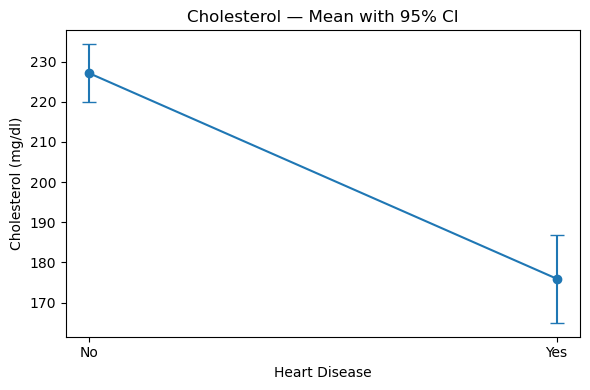

In [28]:
import numpy as np
import matplotlib.pyplot as plt

groups = df.groupby("HeartDisease")["Cholesterol"]
means = groups.mean().reindex([0,1]).values
ses   = groups.sem().reindex([0,1]).values  # standard error of mean
cis   = 1.96 * ses                           # ~95% CI

x = np.array([0,1])

plt.figure(figsize=(6,4))
plt.errorbar(x, means, yerr=cis, fmt="o-", capsize=5)
plt.xticks([0,1], ["No","Yes"])
plt.xlabel("Heart Disease"); plt.ylabel("Cholesterol (mg/dl)")
plt.title("Cholesterol — Mean with 95% CI")
plt.tight_layout(); plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and target (y)
X = heart_data_encoded.drop("HeartDisease", axis=1)
y = heart_data_encoded["HeartDisease"]

# Split into train/test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for Logistic Regression, KNN, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [31]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 is a common starting point
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("🔹 K-Nearest Neighbors Results")
print(classification_report(y_test, y_pred_knn))

🔹 K-Nearest Neighbors Results
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [32]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # limit depth to reduce overfitting
dt.fit(X_train, y_train)   # scaling not needed for trees
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Results")
print(classification_report(y_test, y_pred_dt))

🔹 Decision Tree Results
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        82
           1       0.82      0.82      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



In [33]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)  # scaling not needed for trees
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Results")
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



In [34]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("🔹 Support Vector Machine Results")
print(classification_report(y_test, y_pred_svm))

🔹 Support Vector Machine Results
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

